<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/MLP%EB%A1%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MLP 모델로 이미지 분류해보기**
---
**MNIST 데이터 살펴보기**

먼저 필요한 라이브러리를 import하고 tf.keras.datasets.mnist.load_data() 함수를 이용해 MNIST 데이터셋을 불러옵니다.

In [2]:
import sys
import tensorflow as tf
import numpy as np

In [3]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


5


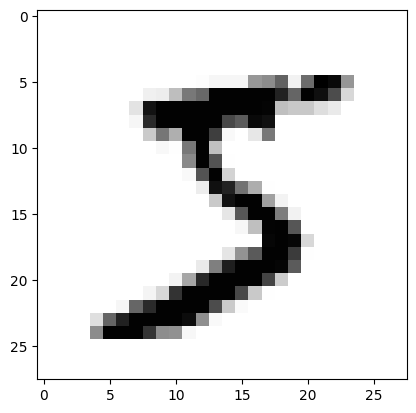

In [4]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

MNIST 데이터는 위와 같이 이미지처럼 나타낼 수 있지만 사실은 2차원 배열에 픽셀 값이 저장되어 있는 형태입니다. 즉 0과 255 사이의 정수로 구성된 데이터입니다.

In [5]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


##**MLP 구조 만들기**
---
MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 벡터 형태입니다.
X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.

In [6]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [7]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


label의 경우 현재 0~9의 정수 값을 가지고 있습니다.
이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다. Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.

In [8]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 Functional API로 만들어 봅시다.

이번에 구현할 모델은 **input layer와 두 개의 hidden layer, 그리고 output layer**로 구성되어 있습니다.
특히 output layer는 특별한 task를 수행하는데, 이 경우에는 **10개의 class를 분류** (multi-class classification)하는 것입니다. 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다. 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다. 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 **softmax**를 사용해야 합니다.

In [10]:
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

##**MLP 모델 Training 하기**
---
model.fit() 함수를 이용하여 모델 학습을 시작합니다.

In [12]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 9s 36ms/step - loss: 12.9446 - categorical_accuracy: 0.7973 - val_loss: 1.6897 - val_categorical_accuracy: 0.9212
Epoch 2/30
48/48 [==============================] - 1s 16ms/step - loss: 1.0779 - categorical_accuracy: 0.9357 - val_loss: 0.9452 - val_categorical_accuracy: 0.9370
Epoch 3/30
48/48 [==============================] - 0s 10ms/step - loss: 0.4858 - categorical_accuracy: 0.9569 - val_loss: 0.7600 - val_categorical_accuracy: 0.9414
Epoch 4/30
48/48 [==============================] - 1s 12ms/step - loss: 0.2502 - categorical_accuracy: 0.9711 - val_loss: 0.6411 - val_categorical_accuracy: 0.9493
Epoch 5/30
48/48 [==============================] - 0s 8ms/step - loss: 0.1299 - categorical_accuracy: 0.9811 - val_loss: 0.6071 - val_categorical_accuracy: 0.9478
Epoch 6/30
48/48 [==============================] - 0s 7ms/step - loss: 0.0689 - categorical_accuracy: 0.9882 - val_loss: 0.5972 - val_categorical_accuracy: 0.9480
Epoch 7/30


training loss와 validation loss를 확인해봅시다.

In [13]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[12.944572448730469, 1.0779290199279785, 0.48575931787490845, 0.25024518370628357, 0.12989811599254608, 0.06890486925840378, 0.03824513033032417, 0.017308278009295464, 0.007680974435061216, 0.003537264419719577, 0.001764880958944559, 0.00044352503027766943, 0.00018559156160335988, 0.0001349787344224751, 0.00011536217061802745, 0.00010336509149055928, 9.458362910663709e-05, 8.773537410888821e-05, 8.155113027896732e-05, 7.638167153345421e-05, 7.196203659987077e-05, 6.808624311815947e-05, 6.437230331357569e-05, 6.130322435637936e-05, 5.840145604452118e-05, 5.557219628826715e-05, 5.3224823204800487e-05, 5.0964346883120015e-05, 4.882971552433446e-05, 4.687105683842674e-05]


In [15]:
# Q. Validation loss를 확인해 보세요.
val_loss = history.history['val_loss']
print(val_loss)

[1.6896589994430542, 0.9451677799224854, 0.7599897384643555, 0.641054630279541, 0.6070905923843384, 0.5971596837043762, 0.5667559504508972, 0.5469549298286438, 0.5480848550796509, 0.5440989136695862, 0.536852240562439, 0.5324572920799255, 0.5348325371742249, 0.5327910780906677, 0.5324874520301819, 0.5324253439903259, 0.5321959853172302, 0.5320678353309631, 0.5321424603462219, 0.5319395065307617, 0.531766951084137, 0.5317768454551697, 0.5316165089607239, 0.5315002202987671, 0.5314627289772034, 0.5313843488693237, 0.5310476422309875, 0.5311927199363708, 0.5310162901878357, 0.5309536457061768]


##**학습된 모델의 성능 확인하기**
---
model.evaluate() 함수에 test 데이터를 입력시켜서 모델의 정확도를 확인하고, 학습이 진행되면서 training loss와 test loss가 어떻게 변하는지 그래프를 그려서 확인해봅시다.

In [16]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4973 - categorical_accuracy: 0.9573

 Test Accuracy: 0.9573


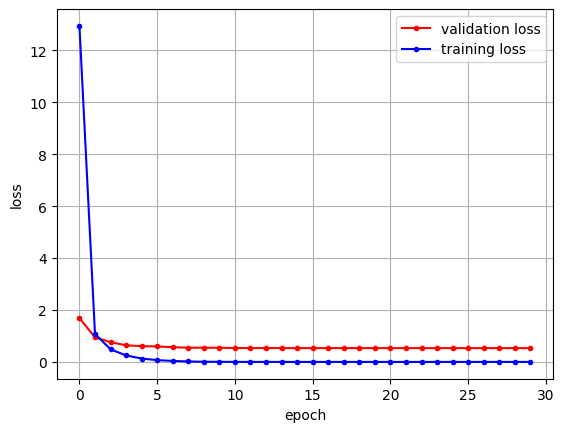

In [18]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##**MLP 모델의 한계를 코드로 확인하기**
---
MLP 모델의 한계를 코드로 확인해 보겠습니다. 원본 데이터를 살짝 변형했을 때 MLP 구조가 이미지를 잘 인식하는지 실펴 보겠습니다.

###**원본 데이터를 변형해서 MLP 구조의 성능 테스트하기**

이번 스텝에서 사용할 OpenCV 라이브러리와 MNIST 데이터를 불러옵시다. 참고로 OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.

In [22]:
# OpenCV 모듈 불러오기
import cv2

In [23]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


이번에는 **MNIST** 데이터에 장난을 조금 쳐보겠습니다.
**OpenCV**의 함수들을 이용해서 **MNIST** 이미지에 **회전 변환과 이동 변환**(선형 변환)을 적용합니다.

선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다. 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

In [24]:
# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

변환된 이미지는 다음과 같습니다.

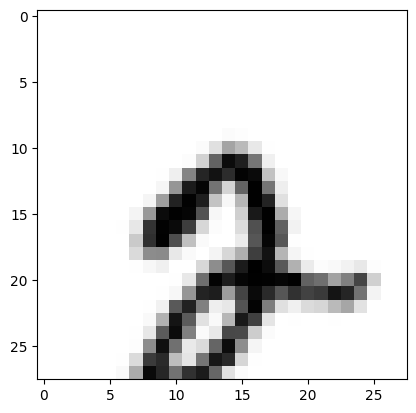

In [25]:
plt.imshow(test_image, cmap='Greys')

MLP 모델은 변환된 이미지도 분류를 잘 할 수 있을까요?
이전 스텝에서와 같이 이미지의 shape을 바꿔주고 모델에 넣어줍니다.

In [26]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [27]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 146ms/step


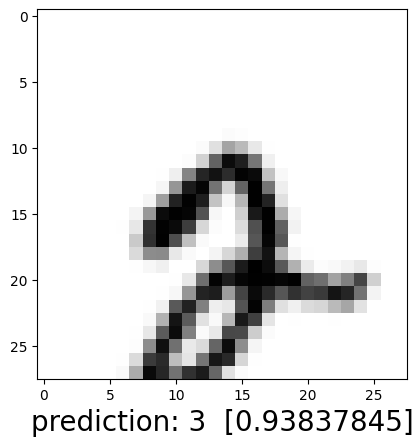

In [28]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

분명히 숫자 2를 나타낸 이미지였지만 간단한 변환을 적용했더니 모델은 데이터를 다른 숫자로 잘못 인식했습니다. 즉 MLP로 학습한 모델은 이미지 분류기로서는 robust classifier가 아니라는 것을 알 수 있습니다. MLP를 이용해서 이미지를 분류하는 데에는 뭔가 문제가 있는 것 같습니다.

그 이유는 MLP는 고차원 데이터의 공간적 구조를 완전히 이해할 수 없기 때문입니다. 때문에 이미지 분류에서는 CNN같은 모델이 분류에 더 효과적입니다.